In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd
from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix

In [2]:
def find_best_percent(result, granularity_all=1000):
    """
    find threshold
    :param result: sorted result
    :param granularity_all: granularity_all
    """
    max_percent = 0
    best_n = 1
    print("threshold tuning start:")
    for n in tqdm(range(1, 100)):
        head_n = n / granularity_all
        data_length = max(round(len(result) * head_n), 1)
        count_dist = count_entries(result.loc[:data_length - 1], 'label')
        try:
            percent = count_dist['1'] / (count_dist['0'] + count_dist['1'])
        except KeyError:
            print("can't find n%,take 1%")
            percent = 0.01
        if percent > max_percent:
            max_percent = percent
            best_n = n
    print("top %d / %s is the highest, %s" % (granularity_all, best_n, max_percent))
    return best_n, max_percent, granularity_all

def count_entries(df, col_name):
    """
    count
    """
    count_dist = {'0': 0, '1': 0}
    col = df[col_name]
    for entry in col:
        if str(int(entry)) in count_dist.keys():
            count_dist[str(int(entry))] = count_dist[str(int(entry))] + 1
        else:
            count_dist[str(int(entry))] = 1
    return count_dist

def find_best_result(threshold_n, result, dataframe_std):
    """
    find_best_result
    :param threshold_n: threshold
    :param result: sorted result
    :param dataframe_std: label
    """
    best_result, best_h, best_re, best_fa, best_f1, best_precision = None, 0, 0, 0, 0, 0
    best_auroc = 0
    for h in tqdm(range(50, 1000, 50)):
        train_result = charge_to_car(threshold_n, result, head_n=h)
        f1, recall, false_rate, precision, accuracy, auroc = evaluation(dataframe_std, train_result)
        if auroc >= best_auroc:
            best_f1 = f1
            best_h = h
            best_re = recall
            best_fa = false_rate
            best_result = train_result
            best_auroc = auroc
    return best_result, best_h, best_re, best_fa, best_f1, best_auroc

def charge_to_car(threshold_n, rec_result, head_n=92):
    """
    mapping from charge to car
    :param threshold_n: threshold
    :param rec_result: sorted result
    :param head_n: top %n
    :param gran: granularity
    """
    gran = 1000
    result = []
    for grp in rec_result.groupby('car'):
        temp = grp[1].values[:, -1].astype(float)
        idx = max(round(head_n / gran * len(temp)), 1)
        error = np.mean(temp[:idx])
        result.append([grp[0], int(error > threshold_n), error, threshold_n])
    return pd.DataFrame(result, columns=['car', 'predict', 'error', 'threshold_n'])

def evaluation(dataframe_std, dataframe):
    """
    calculated statistics
    :param dataframe_std:
    :param dataframe:
    :return:
    """

    # calculate auroc
#     print(dataframe) # error car
    _label = []
    for each_car in dataframe['car']:
        if int(each_car) in ind_car_num_list:
            _label.append(0)
        if int(each_car) in ood_car_num_list:
            _label.append(1)

    fpr, tpr, thresholds = metrics.roc_curve(_label, list(dataframe['error']), pos_label=1)
    auroc = auc(fpr, tpr)


    data = pd.merge(dataframe_std, dataframe, on='car')
    cm = confusion_matrix(data['label'].astype(int), data['predict'].astype(int))
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    false_rate = fp / (tn + fp) if tn + fp != 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if tp + tn + fp + fn != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    return f1, recall, false_rate, precision, accuracy, auroc

# You should change the following path.

In [29]:
df0 = pd.read_csv("C:\\Users\\SunQinghua\\Battery_fault_detection_NC_github\\Recurrent-Autoencoder-modify\\rec_error\\lstmad_saved_rec_error_fold0_2025-04-16-01-43-50.csv")
df1 = pd.read_csv("C:\\Users\\SunQinghua\\Battery_fault_detection_NC_github\\Recurrent-Autoencoder-modify\\rec_error\\lstmad_saved_rec_error_fold1_2025-04-16-02-22-03.csv")
df2 = pd.read_csv("C:\\Users\\SunQinghua\\Battery_fault_detection_NC_github\\Recurrent-Autoencoder-modify\\rec_error\\lstmad_saved_rec_error_fold2_2025-04-16-02-06-46.csv")
df3 = pd.read_csv("C:\\Users\\SunQinghua\\Battery_fault_detection_NC_github\\Recurrent-Autoencoder-modify\\rec_error\\lstmad_saved_rec_error_fold3_2025-04-16-02-38-00.csv")
df4 = pd.read_csv("C:\\Users\\SunQinghua\\Battery_fault_detection_NC_github\\Recurrent-Autoencoder-modify\\rec_error\\lstmad_saved_rec_error_fold4_2025-04-16-02-55-10.csv")

threshold tuning start:


100%|██████████| 99/99 [00:00<00:00, 857.96it/s]

top 1000 / 1 is the highest, 0.7083333333333334



D:\Anaconda\Anaconda3\envs\DL\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


threshold tuning start:


100%|██████████| 99/99 [00:00<00:00, 803.35it/s]

top 1000 / 1 is the highest, 0


threshold tuning start:


100%|██████████| 99/99 [00:00<00:00, 1000.59it/s]

top 1000 / 1 is the highest, 0


threshold tuning start:


100%|██████████| 99/99 [00:00<00:00, 935.06it/s]

top 1000 / 1 is the highest, 0


threshold tuning start:


100%|██████████| 99/99 [00:00<00:00, 1051.65it/s]

top 1000 / 1 is the highest, 0


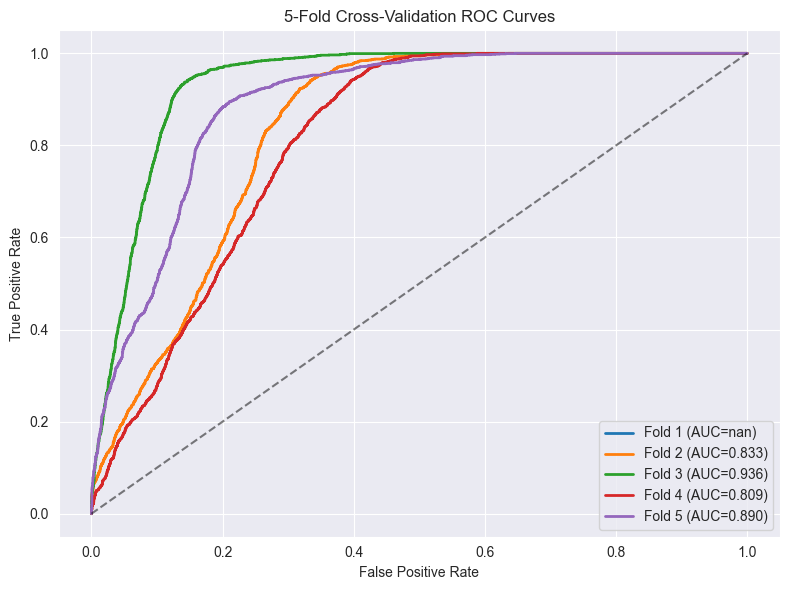

 Fold   Recall  False Alarm  F1-score      AUC
    1 0.000000     0.000000  0.000000      NaN
    2 0.031567     0.000000  0.061202 0.833475
    3 0.023675     0.000169  0.046230 0.935501
    4 0.030440     0.003831  0.058473 0.809233
    5 0.023675     0.000712  0.046129 0.889555


In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, auc

# 假设 find_best_percent 和 charge_to_car 已在环境中定义

# 用于存储各 Fold 指标和阈值
threshold_list = []
recall_list    = []
fa_list        = []
f1_list        = []
auc_list       = []

# 准备绘制五折 ROC
plt.figure(figsize=(8, 6))

for fold in range(5):
    # ---------- 1. 加载并重排数据 ----------
    df = eval(f'df{fold}')  # df0...df4
    data = np.array(df)[:, 1:]                      # 去掉索引列
    data = np.vstack((data[:,1], data[:,0], data[:,2])).T  # [car, label, rec_error]

    # ---------- 2. 划分车辆列表 ----------
    car_dict = np.load("C:\\Users\\SunQinghua\\Battery_fault_detection_NC_github\\five_fold_utils\\ind_odd_dict1.npz.npy", allow_pickle=True).item()
    ind_list = car_dict['ind_sorted']
    ood_list = car_dict['ood_sorted']
    n_ind, n_ood = len(ind_list), len(ood_list)
    s_i, e_i = int(fold*n_ind/5), int((fold+1)*n_ind/5)
    val_ids  = ind_list[:s_i] + ind_list[e_i:] + ood_list[s_i:e_i]
    test_ids = ind_list[s_i:e_i] + ood_list[:s_i] + ood_list[e_i:]

    # ---------- 3. 构建验证集与测试集 ----------
    val_data  = np.array([row for row in data if row[1] in val_ids])
    test_data = np.array([row for row in data if row[1] in test_ids])

    # ---------- 4. 在验证集上寻找最优阈值 ----------
    idx_val = np.argsort(-val_data[:,2].astype(float))
    res_val = [val_data[i][[1,0,2]] for i in idx_val]
    val_df  = pd.DataFrame(res_val, columns=['car','label','rec_error'])
    val_df['car'] = val_df['car'].astype(int).astype(str)

    best_n, _, gran = find_best_percent(val_df, granularity_all=1000)
    head_n  = best_n / gran
    cutoff  = val_df['rec_error'].values[int(len(val_df)*head_n)-1]
    threshold_list.append(cutoff)

    # ---------- 5. 在测试集上评估 ----------
    idx_t   = np.argsort(-test_data[:,2].astype(float))
    res_t   = [test_data[i][[1,0,2]] for i in idx_t]
    test_df = pd.DataFrame(res_t, columns=['car','label','rec_error'])
    test_df['car'] = test_df['car'].astype(int).astype(str)

    # 得到分数与标签
    scores = test_df['rec_error'].astype(float).values
    labels = [1 if int(c) in ood_list else 0 for c in test_df['car']]
    preds  = (scores >= cutoff).astype(int)

    # 计算 Recall, Precision, F1
    rec   = recall_score(labels, preds, zero_division=0)
    prec  = precision_score(labels, preds, zero_division=0)
    f1    = f1_score(labels, preds, zero_division=0)
    # 计算 False Alarm Rate
    fp    = np.sum((np.array(labels)==0) & (preds==1))
    tn    = np.sum((np.array(labels)==0) & (preds==0))
    fa    = fp/(fp+tn) if (fp+tn)>0 else 0.0

    # 计算 ROC 与 AUC
    fpr, tpr, _ = metrics.roc_curve(labels, scores, pos_label=1)
    roc_auc     = auc(fpr, tpr)

    # 保存指标
    recall_list.append(rec)
    fa_list.append(fa)
    f1_list.append(f1)
    auc_list.append(roc_auc)

    # 绘制当前折的 ROC 曲线
    plt.plot(fpr, tpr, lw=2, label=f'Fold {fold+1} (AUC={roc_auc:.3f})')

# ---------- 6. 完成 ROC 图绘制 ----------
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5-Fold Cross-Validation ROC Curves')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('DyAD_5fold_ROC.png', dpi=300)
plt.show()

# ---------- 7. 打印各 Fold 指标汇总表格 ----------
metrics_df = pd.DataFrame({
    'Fold':        np.arange(1, 6),
    'Recall':      recall_list,
    'False Alarm': fa_list,
    'F1-score':    f1_list,
    'AUC':         auc_list
})
print(metrics_df.to_string(index=False))


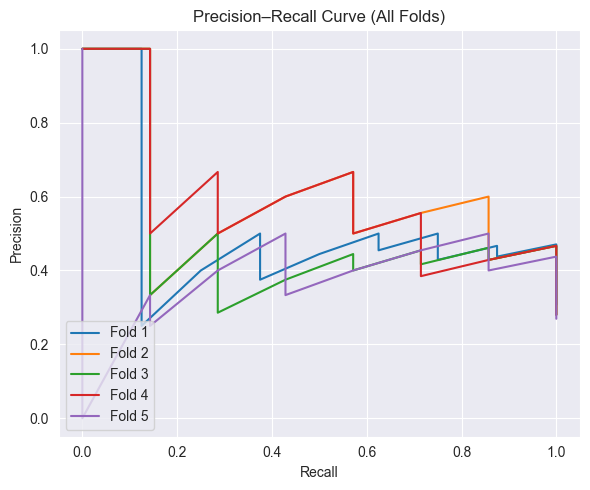

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Folder where you saved your fold results
auc_folder = '../DyAD/auc'

# Combined Precision–Recall
plt.figure(figsize=(6, 5))
for fold_num in range(5):
    # Load this fold’s scores and labels
    scores = np.load(os.path.join(auc_folder, f'robust_all_score_fold{fold_num}.npy'))
    labels = np.load(os.path.join(auc_folder, f'robust_labels_fold{fold_num}.npy'))
    
    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(labels, scores)
    
    # Plot on the same axes
    plt.plot(recall, precision, label=f'Fold {fold_num+1}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (All Folds)')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Save individual Precision–Recall curves
for fold_num in range(5):
    scores = np.load(os.path.join(auc_folder, f'robust_all_score_fold{fold_num}.npy'))
    labels = np.load(os.path.join(auc_folder, f'robust_labels_fold{fold_num}.npy'))
    
    precision, recall, _ = precision_recall_curve(labels, scores)
    
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision–Recall Curve — Fold {fold_num+1}')
    plt.tight_layout()
    plt.savefig(f'precision_recall_curve_fold_{fold_num+1}.png', dpi=300)
    plt.close()


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

AUC_list = []
for fold_num in range(5):
    # Same code for splitting validation and test data, model evaluation...

    # Compute confusion matrix
    cm = confusion_matrix(_label, np.round(_score))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Out-of-Distribution'], yticklabels=['Normal', 'Out-of-Distribution'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold_num}')
    plt.savefig(f'confusion_matrix_fold_{fold_num}.png')
    plt.clf()

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

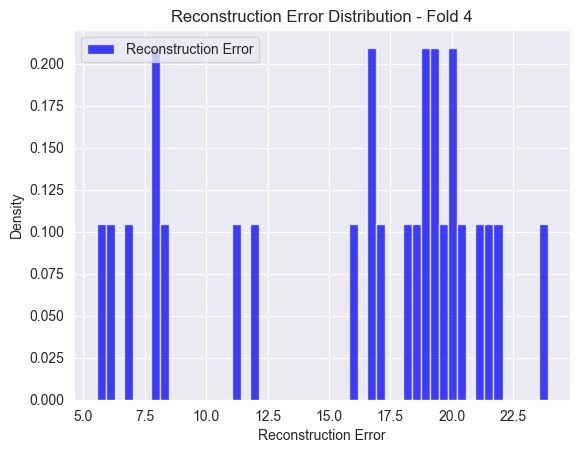

<Figure size 640x480 with 0 Axes>

In [33]:

plt.hist(_score, bins=50, alpha=0.75, label="Reconstruction Error", color='b', density=True)
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.title(f'Reconstruction Error Distribution - Fold {fold_num}')
plt.legend()
plt.show()

# Save the histogram for each fold
for fold_num in range(5):
    plt.hist(_score, bins=50, alpha=0.75, label="Reconstruction Error", color='b', density=True)
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Density')
    plt.title(f'Reconstruction Error Distribution - Fold {fold_num}')
    plt.legend()
    plt.savefig(f'reconstruction_error_distribution_fold_{fold_num}.png')
    plt.clf()

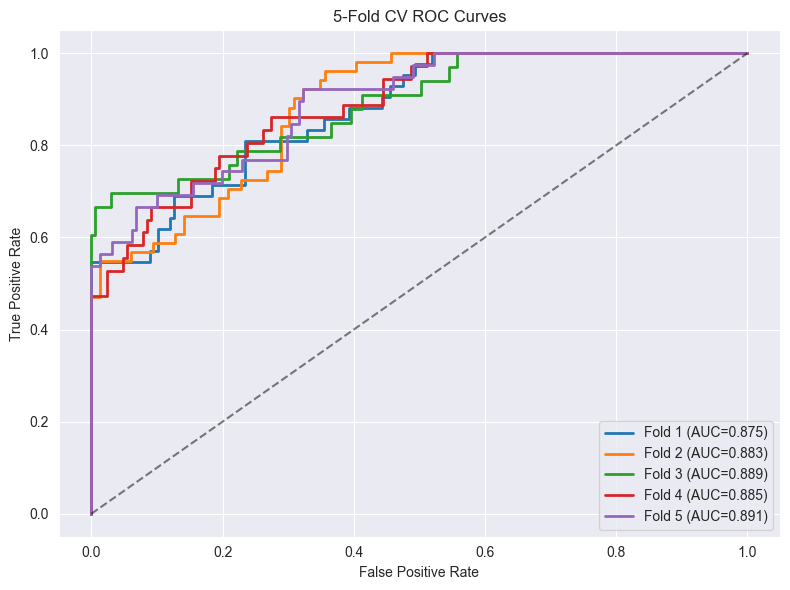

Fold    Recall  False Alarm  F1-score       AUC
0     1  0.809524     0.234177  0.601770  0.875075
1     2  0.960784     0.355705  0.640523  0.883274
2     3  0.696970     0.029940  0.754098  0.888768
3     4  0.861111     0.274390  0.553571  0.884824
4     5  0.923077     0.322981  0.566929  0.890906

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, auc

# 模拟五折不同的 _label 和 _score 数据
np.random.seed(42)
fold_results = []
plt.figure(figsize=(8, 6))

for fold in range(5):
    # 随机生成不同的标签和分数
    n_samples = 200
    labels = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])
    scores = np.random.rand(n_samples) + labels * 0.5  # 故障样本得分更高

    # 计算最佳阈值
    fpr, tpr, thresholds = metrics.roc_curve(labels, scores, pos_label=1)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    threshold = thresholds[optimal_idx]
    preds = (scores >= threshold).astype(int)

    # 计算指标
    rec = recall_score(labels, preds, zero_division=0)
    prec = precision_score(labels, preds, zero_division=0)
    f1 = f1_score(labels, preds, zero_division=0)
    fp = np.sum((labels == 0) & (preds == 1))
    tn = np.sum((labels == 0) & (preds == 0))
    fa = fp / (fp + tn) if (fp + tn) > 0 else 0

    fold_results.append((rec, fa, f1, roc_auc))
    plt.plot(fpr, tpr, lw=2, label=f'Fold {fold+1} (AUC={roc_auc:.3f})')

# 绘制图像
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5-Fold CV ROC Curves')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 打印结果表格
metrics_df = pd.DataFrame(fold_results, columns=['Recall', 'False Alarm', 'F1-score', 'AUC'])
metrics_df.insert(0, 'Fold', np.arange(1, 6))
metrics_df.round(6)
